In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_itens = pd.read_pickle('Itens.pkl')
df_itens.shape

(98707, 56)

In [3]:
df_empresas = pd.read_pickle('Empresas.pkl')

In [4]:
df_base = pd.merge(df_empresas,df_itens, left_on=['cnpj'], right_on=['TAXNUM'], how='inner')

<h2> Seta o target baseado em análise de amostragem das oportunidades onde: "Awarded", "Enabled" e "Homologated" são considerados ganhadores e os demais, perdedores

In [5]:
dict_target_4 = {

'Disqualification Technical Opinion': 0,
'Disqualification Excessive Price': 0,
'Disqualification Over Estimated': 0,
'Renunciation': 0,
'Declassification Proposal Invalid': 0,
'Disability - Technical qualification.': 0,
'Disability - Financial Economic Capacity.': 0,
'Did Not Present': 0,
'Disqualification Price unenforceable': 0,
'Disability - Absence of Response.': 0,
'Supplier disqualified by High GRI': 0,
'Disqualification - Breach of notice': 0,
'Desclassification - Current administrative sanctio': 0,
'Disability – Acquisit. of Rights and Contraction o': 0,
'Disqualification - Notice': 0,
'Disability - Supplier IDF below required': 0,
'Featured Quotation':0,
'Accepts':0,
'Awarded':1,
'Enabled':1,
'Homologated':1
}

df_base['ganhador'] = df_base['CHARACTERISTIC'].replace(dict_target_4)

<h2> Construindo uma nova feature de valor unitário dividindo o total pela quantidade, agregando, por exemplo, valores de impostos que são imbutidos somente no valor total

In [6]:
df_base['UNIT_VALUE_NEW'] = df_base['TOTAL_VALUE'] / df_base['QUANTITY_y']

<AxesSubplot:>

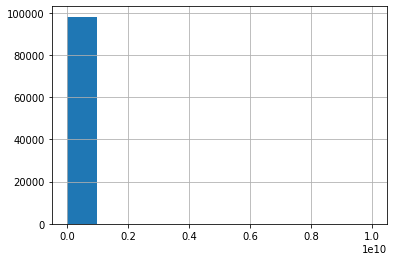

In [7]:
df_base['UNIT_VALUE_NEW'].hist()

In [9]:
df_base['MEPP_y'] = df_base['MEPP_y'].apply(lambda x: '1' if x=='X' else '0')

,count,unique,top,freq,remover
cnpj,98536,5599,05808502000167,1830,False
razao_social,98536,5497,BR COMPRESSORES SERVICE LTDA,1830,False
natureza_jur,98536,15,Sociedade Empresária Limitada,90624,False
quali_resp,98536,9,Sócio-Administrador,74745,False
porte,98536,3,Demais,60794,False
...,...,...,...,...,...
CREATED_AT_DATE,98536,1516,2020-06-25,396,False
CREATED_AT_TIME,98536,30056,16:05:50,180,False
CHARACTERISTIC,98536,26,Featured Quotation,46069,False
Chave,98536,15654,7003845824--0001,86,False


In [ ]:
columns_to_remove = [
 'OPPORT_TYPE',
 'CURRENCY',
 'MEPP_x',
 'OPPORT_TYPE_DESC',
 'GROUPING_LEVEL',
 'LOTE',
 'TOTAL',
 'Grupo',
 'NewFamília',
 'Segmento',
 'Escopo',
 'Tipo',
 'CREATED_AT_DATE',
 'CREATED_AT_TIME',
 'NUMBER_INT',
 'ATTACHMENTS',
 'TZONE',
 'MESSAGES',
 'DESCRIPTION',
 'OPPORT_NUM',
 'QUANTITY_x',
 'YPFAMITEM',
 'ORDERED_PROD',
 'CHARACTERISTIC',
 'STATUS',
 'SUPPLIER_NAME',
 'DESCRIPTION_UC',
 'UNIT',
 'DOU_PUBL_DATE'
 ]